Crime Rate Analysis and Prediction Using Machine Learning

Who: M
4W - Who, What, Where, Why

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
# https://www.kaggle.com/datasets/akma1xz/draft-dataset
df = pd.read_csv("crime_district.csv")

In [42]:
df.head(5)

,state,district,category,type,date,crimes
0,Malaysia,All,assault,all,2016-01-01,22327
1,Malaysia,All,assault,all,2017-01-01,21366
2,Malaysia,All,assault,all,2018-01-01,16902
3,Malaysia,All,assault,all,2019-01-01,16489
4,Malaysia,All,assault,all,2020-01-01,13279


In [43]:
df.shape

(19152, 6)

In [44]:
df.columns

Index(['state', 'district', 'category', 'type', 'date', 'crimes'], dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19152 entries, 0 to 19151
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   state     19152 non-null  object
 1   district  19152 non-null  object
 2   category  19152 non-null  object
 3   type      19152 non-null  object
 4   date      19152 non-null  object
 5   crimes    19152 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 897.9+ KB


In [46]:
# Data Cleaning

df = df.dropna()

# Remove duplicate row
df = df.drop_duplicates()

In [55]:
# Convert to string and lowercase to be safe
for col in ['district', 'category', 'type', 'date']:
    df[col] = df[col].astype(str)

# Remove rows containing 'all'
df = df[
    (df['district'].str.lower() != 'all') &
    (df['category'].str.lower() != 'all') &
    (df['type'].str.lower() != 'all') &
    (df['date'].str.lower() != 'all')
]

# Reset index
df = df.reset_index(drop=True)


In [56]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year as numeric feature
df['year'] = df['date'].dt.year

# Remove rows where year could not be extracted
df = df.dropna(subset=['year'])

# Convert to integer
df['year'] = df['year'].astype(int)


In [57]:
df[['date', 'year']].head()

,date,year
0,2016-01-01,2016
1,2017-01-01,2017
2,2018-01-01,2018
3,2019-01-01,2019
4,2020-01-01,2020


In [58]:
# Combine all record per district per year

df_grouped = (df.groupby(['state','district','year'], as_index=False)['crimes'].sum())

In [68]:
df_grouped['district_code'] = (df_grouped['district'].astype('category').cat.codes)

In [70]:
X = df_grouped['year'].values
y = df_grouped['crimes'].values

In [71]:
x_mean = np.mean(x)
y_mean = np.mean(y)

m = np.sum((X-x_mean)*(y-y_mean))/np.sum((X-x_mean)**2)
c = y_mean - m*x_mean

print('Slope (m):',m)
print('Intercept (c):',c)

Slope (m): -0.00033469667502606065
Intercept (c): 485.525137404119


In [75]:
y_pred = m * X + c

In [76]:
mse = np.mean((y-y_pred)**2)
print('Mean Squared Error:', mse)

Mean Squared Error: 437204.7962522137


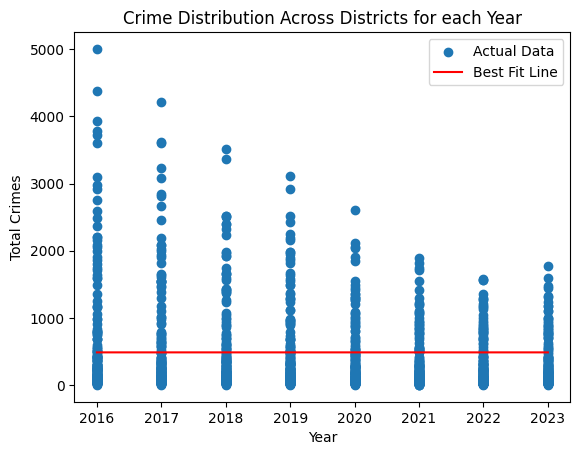

In [80]:
plt.scatter(X,y,label='Actual Data')
plt.plot(X, y_pred, color='red', label='Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Crime Distribution Across Districts for each Year')
plt.legend()
plt.show()

At the aggregated district level, the Linear Regression model does not show a significant downward trend. Crime levels vary by district, and these variations offset each other in the overall average.

In [81]:
crime_by_type = df.groupby('type')['crimes'].sum()
crime_by_type

type
break_in                    114734
causing_injury               35608
murder                        2462
rape                         13868
robbery_gang_armed             205
robbery_gang_unarmed         44360
robbery_solo_armed              67
robbery_solo_unarmed         26089
theft_other                 146660
theft_vehicle_lorry          11504
theft_vehicle_motorcar       47281
theft_vehicle_motorcycle    162659
Name: crimes, dtype: int64